<a href="https://colab.research.google.com/github/JeancoMontoyaC/Proyectos-IA/blob/main/Proyecto_redes_neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

::<center>

**PROYECTO 4**



---
 Inteligencia Artificial Universidad Nacional de Colombia


---
**Integrantes:**

Alejandra Barrientos Grisales

Jean Carlo Montoya Castro

Alejandro Salazar Mejía



</center>

##Objetivo:

Nuestro dataset consiste de imágenes con dedos levantados que indican números. Estas imágenes son a blanco y negro  y de tamaño 128 x 128 pixeles. Además, por razones prácticas, utilizamos solo la mano derecha.

## Preprocesamiento:

A continuación se muestra el preprocesamiento del dataset para trasformar cada imagen en un arreglo (imagen, etiqueta). Este proceso requería tener acceso directo a los datos los cuales eran muchos y muy pesados, por lo tanto se guardaron los arreglos en un archivo .npy. Este proceso esta comentado porque se hizo localmente.



```
# direccion local en donde se encuentran las imágenes de training
TRAIN_DIR = 'C:/Users/alejo/Downloads/archive/train'
path = TRAIN_DIR

training_data = []

# Cada imagen tiene codificada su etiqueta al final del nombre del archivo.
# Así, si el nombre del archivo termina en 0R.png es porque es la mano derecha 
# y tiene 0 dedos levantados.
for img in tqdm(os.listdir(path)):
    # se itera por cada archivo (que es una imagen) dentro del directorio que 
    # contiene las imagenes de training.
    
    # Pasamos la imagen a una matriz (tensor) de tres dimensiones
    img_array = cv2.imread(os.path.join(path, img))

    # Removemos la extensión '.png' del nombre del archivo
    img = img.rstrip('.png')

    # Si el nombre de la imagen termina en '0R' entonces agregamos los datos 
    # de la imagen como tensor junto a la etiqueta '0'.
    # De igual forma si termina en '1R', '2R', '3R', '4R' ó '5R'.
    if img[-2:] == '0R':
        training_data.append([img_array, 0])
        continue
    elif img[-2:] == '1R':
        training_data.append([img_array, 1])
        continue
    elif img[-2:] == '2R':
        training_data.append([img_array, 2])
        continue
    elif img[-2:] == '3R':
        training_data.append([img_array, 3])
        continue
    elif img[-2:] == '4R':
        training_data.append([img_array, 4])
        continue
    elif img[-2:] == '5R':
        training_data.append([img_array, 5])
        continue

# Se revuelven los datos
shuffle(training_data)

X_train = []
y_train = []

# Dividimos los datos en dos arreglos diferentes, uno con las imágenes y el otro
# con las etiquetas
for features, label in training_data:
  X_train.append(features)
  y_train.append(label)

# forma requerida por keras: (batch_size, dim_1, dim_2, channels), default channels_last
X_train = np.array(X_train)
y_train = np.array(y_train)

#Guardar los datos para no tener que cargar todo nuevamente.
np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)

```





```
# Dirección local del archivo donde se encontran las imágenes de test.
TEST_DIR = 'C:/Users/alejo/Downloads/archive/test'
path = TEST_DIR


# El procedimiento implementado es totalmente análogo al ya explicado
# en el bloque anterior para los datos de training.
testing_data = []

for img in tqdm(os.listdir(path)):
    img_array = cv2.imread(os.path.join(path, img))

    img = img.rstrip('.png')
    # print(img)

    if img[-2:] == '0R':
        testing_data.append([img_array, 0])
        continue
    elif img[-2:] == '1R':
        testing_data.append([img_array, 1])
        continue
    elif img[-2:] == '2R':
        testing_data.append([img_array, 2])
        continue
    elif img[-2:] == '3R':
        testing_data.append([img_array, 3])
        continue
    elif img[-2:] == '4R':
        testing_data.append([img_array, 4])
        continue
    elif img[-2:] == '5R':
        testing_data.append([img_array, 5])
        continue

shuffle(testing_data)


X_test = []
y_test = []

for features, label in testing_data:
  X_test.append(features)
  y_test.append(label)

# forma requerida por keras: (batch_size, dim_1, dim_2, channels), default channels_last
X_test = np.array(X_test)
y_test = np.array(y_test)

#Guardar los datos para no tener que cargarlos nuevamente
np.save('X_test.npy', X_test)
np.save('y_test.npy', y_test)

```





```
# Dividimos los datos para entrenamiento y validacion
# Esto debido a que nuestro data set ya venía con datos separados para 
# training y test pero no validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                    test_size = 0.2, #80% datos de entrenamiento, 20% validacion
                                                    stratify = y_train)

#Guardar los datos para no tener que cargarlos nuevamente
np.save('X_valid.npy', X_valid)
np.save('y_valid.npy', y_valid)


```



In [ ]:
#Comentar si se usa desde escritorio.
!pip install keras
from google.colab import drive
drive.mount('/content/drive/')    #Acceder a las carpetas training data y validadtion que están desde google drive.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/drive/


In [ ]:
# Librerias usadas
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import itertools
import math
import os
from sklearn.metrics import confusion_matrix
from skimage import io 
from skimage.transform import rescale, resize, downscale_local_mean
from random import randint, choice, choices
from tensorflow import keras
from PIL import Image
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import cv2
from tqdm import tqdm
from random import shuffle
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, Activation, BatchNormalization

A continuación se leen los datos guardados previamente y se normalizan las imágenes

In [ ]:
#Cargado de imágenes
#Ruta donde esté ubicado el archivo .npy, este se debera cambiar para qu eles funcione
path = "/content/drive/MyDrive/MICROPROYECTOS IA/Microproyecto 4/"
X_train = np.load(path + 'X_train.npy', allow_pickle=True) 
y_train = np.load(path + 'y_train.npy', allow_pickle=True)
X_train = X_train/255      #255 es el valor en la escala más alta de colores.

X_test = np.load(path + 'X_test.npy', allow_pickle=True) 
y_test = np.load(path + 'y_test.npy', allow_pickle=True)
X_test = X_test/255 #255 es el valor en la escala más alta de colores.

X_valid = np.load(path + 'X_valid.npy', allow_pickle=True) 
y_valid = np.load(path + 'y_valid.npy', allow_pickle=True)
X_valid = X_valid/255 #255 es el valor en la escala más alta de colores.

names = ['0R', '1R', '2R', '3R', '4R', '5R']

In [ ]:
y_train

array([2, 2, 2, ..., 5, 4, 1], dtype=int32)

Mostramos algunos ejemplos con su correspondiente etiqueta

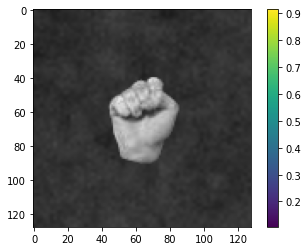

0

In [ ]:
#ejemplos
mano = 9
plt.figure()
plt.imshow(X_train[mano])
plt.colorbar()
plt.grid(False)
plt.show()
y_train[mano]

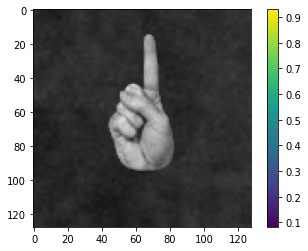

1

In [ ]:
plt.figure()
plt.imshow(X_test[mano+1])
plt.colorbar()
plt.grid(False)
plt.show()
y_test[mano+1]

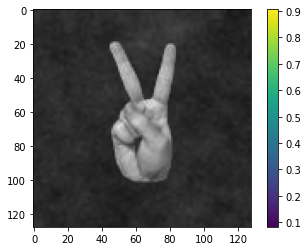

2

In [ ]:
plt.figure()
plt.imshow(X_valid[mano])
plt.colorbar()
plt.grid(False)
plt.show()
y_valid[mano]

A continuación se imprimen las dimensiones del set de training, testing y validation

In [ ]:
#dimensiones del set de training
print(X_train.shape)
print(y_train.shape)

#dimensiones del set de testing
print(X_test.shape)
print(y_test.shape)

#dimensiones del set de validation
print(X_valid.shape)
print(y_valid.shape)

(9000, 128, 128, 3)
(9000,)
(1800, 128, 128, 3)
(1800,)
(1800, 128, 128, 3)
(1800,)


Como resultado obtuvimos que hay 9000, 1800 y 1800 imágenes de training, testing y validatios respectivamente.

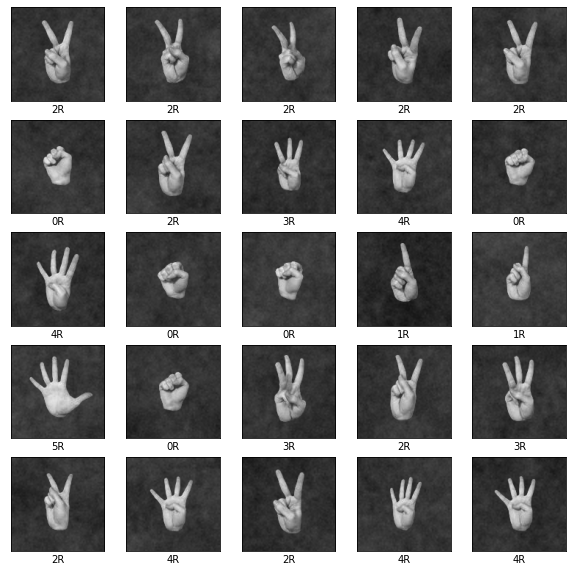

In [ ]:
#Primeras 25 imagenes de las imagenes de entrenamiento

plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(names[y_train[i]])
plt.show()

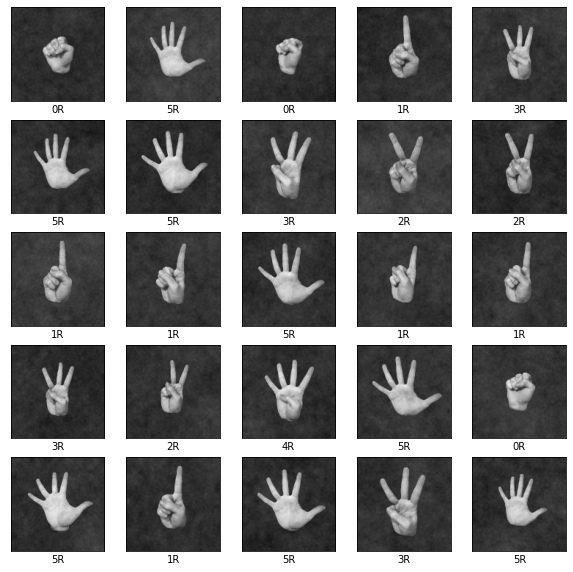

In [ ]:
#Primeras 25 imagenes de las imagenes de validación
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_valid[i])
    plt.xlabel(names[y_valid[i]])
plt.show()

A continuación usamos una red neuronal artificial con dos layers y también usamos ReLu

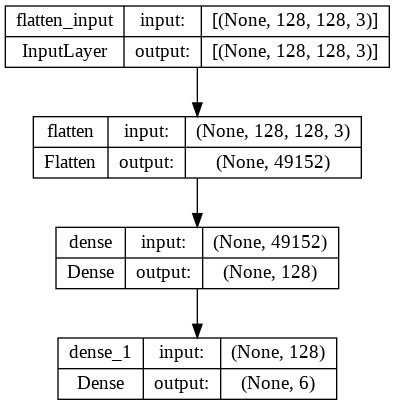

In [ ]:
#Declarar estructura del modelo.
#Red neuronal artificial
model_RN = models.Sequential()
model_RN.add(layers.Flatten(input_shape=(128,128,3)))#se aplana
model_RN.add(layers.Dense(128, activation='relu'))#usamos 128 neuronas y relu
model_RN.add(layers.Dense(len(names), activation=tf.nn.softmax))#para la salida usamos softmax

tf.keras.utils.plot_model(model_RN, show_shapes=True)   #Visualizar la estructura del modelo

Luego, para terminar de definir completamente la red neuronal necesitamos fijar un optimizador, una función de pérdida y que imprima el accuracy en cada época.

In [ ]:
model_RN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_RN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 128)               6291584   
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                                                 
Total params: 6,292,358
Trainable params: 6,292,358
Non-trainable params: 0
_________________________________________________________________


Procedemos a entrenar el modelo

In [ ]:
history_RN = model_RN.fit(X_train,y_train,
                    validation_data=(X_valid, y_valid),
                    epochs=5)

Epoch 1/5
282/282 [==============================] - 22s 73ms/step - loss: 0.5409 - accuracy: 0.9064 - val_loss: 0.0715 - val_accuracy: 0.9789
Epoch 2/5
282/282 [==============================] - 14s 49ms/step - loss: 0.0330 - accuracy: 0.9912 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 3/5
282/282 [==============================] - 12s 42ms/step - loss: 0.0107 - accuracy: 0.9979 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 4/5
282/282 [==============================] - 12s 42ms/step - loss: 0.0564 - accuracy: 0.9832 - val_loss: 0.0052 - val_accuracy: 0.9994
Epoch 5/5
282/282 [==============================] - 12s 42ms/step - loss: 0.0044 - accuracy: 0.9991 - val_loss: 0.0013 - val_accuracy: 1.0000


Desde la época 8 se alcanza un accuracy de 1 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


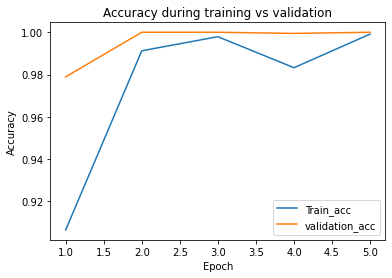

In [ ]:
history_dict = history_RN.history
print(history_dict.keys())
epochs = range(1, len(history_dict["accuracy"]) + 1)

plt.plot(epochs, history_dict["accuracy"])
plt.plot(epochs, history_dict["val_accuracy"])
plt.legend(["Train_acc", "validation_acc"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy during training vs validation")
plt.show()

Durante el entrenamiento el accuracy no bajó de 0.98 en general

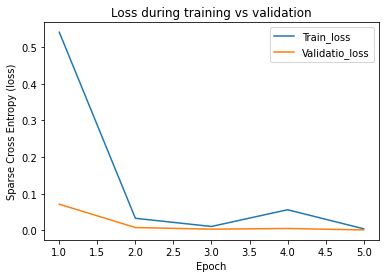

In [ ]:
plt.plot(epochs, history_dict["loss"])
plt.plot(epochs, history_dict["val_loss"])
plt.legend(["Train_loss", "Validatio_loss"])
plt.xlabel("Epoch")
plt.ylabel("Sparse Cross Entropy (loss)")
plt.title("Loss during training vs validation")
plt.show()

Se puede observar que la pérdida tiene valores muy bajos, lo que significa que el modelo está clasificando bien

## CNN

A continuación aplicamos redes neutonales convolucionles al dataset

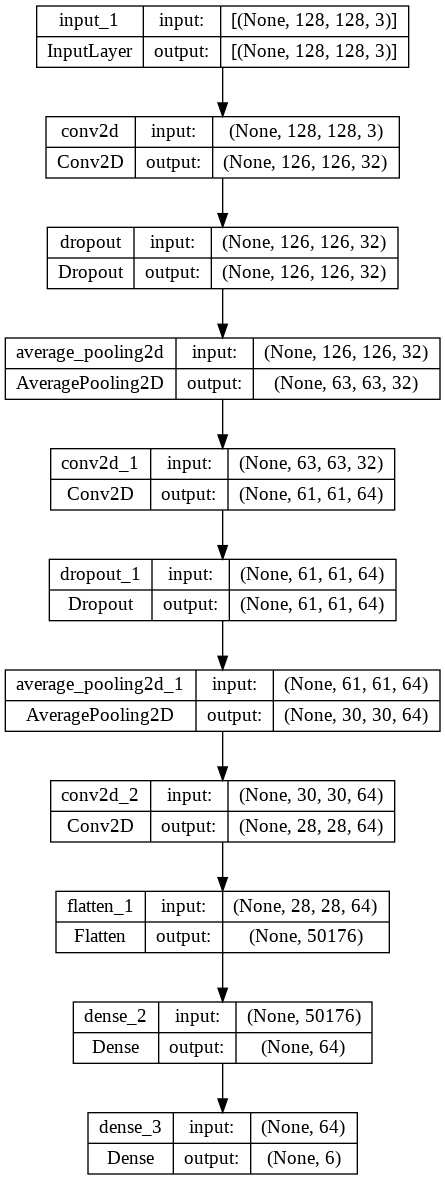

In [ ]:
#Otra forma de declarar el modelo
model_CNN = keras.Sequential([
    keras.layers.Input(shape=(128,128,3)),      #Se van a recibir imagenes con estas entradas.
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'), #32 mapeos/neuronas de características representativas, con un filtro de 3x3
    keras.layers.Dropout(0.2), #se ignoran el 20% de las neuronas
    keras.layers.AveragePooling2D(pool_size=(2, 2)),#poling de 2x2
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Dropout(0.4), #se ignoran el 20% de las neuronas

    keras.layers.AveragePooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),   


    #Etapa de clasificacion
    keras.layers.Flatten(),     #Aplanar los datos a un vector unidimensional
    keras.layers.Dense(64, activation=tf.nn.relu),#Implementza la operación f(z)
    
    keras.layers.Dense(len(names), activation=tf.nn.softmax)
])
tf.keras.utils.plot_model(model_CNN, show_shapes=True)

In [ ]:
model_CNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 dropout (Dropout)           (None, 126, 126, 32)      0         
                                                                 
 average_pooling2d (AverageP  (None, 63, 63, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 61, 61, 64)        0         
                                                                 
 average_pooling2d_1 (Averag  (None, 30, 30, 64)       0         
 ePooling2D)                                          

In [ ]:
model_CNN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("RELU")
history_relu = model_CNN.fit(X_train,y_train,
                    validation_data=(X_valid, y_valid),
                    epochs=1)
print("======")


RELU
282/282 [==============================] - 289s 1s/step - loss: 0.1095 - accuracy: 0.9622 - val_loss: 1.3796e-04 - val_accuracy: 1.0000


Desde la época 1 el accuracy es muy alto, incluso aplicando Dropout.

282/282 [==============================] - 63s 223ms/step
Confusion Matrix


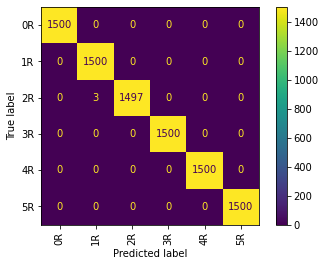

In [ ]:
#Datos de entrenamiento.
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
predictions=model_CNN.predict(X_train)
y_pred = np.argmax(predictions, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=names)
disp.plot(xticks_rotation='vertical', values_format='d')

La matriz de confusión muestra que las predicciones sobre los datos de entrenamiento son muy precisas. Esto es parte se debe a que todas las imágenes son muy 'puras'. 

In [ ]:
#Entrenamiento
predictions=model_CNN.predict(X_train)
decoded_predictions = predictions.argmax(axis=1)

print(f'Reporte de clasificación:')
print(classification_report(y_train,decoded_predictions))

282/282 [==============================] - 61s 215ms/step
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1500
           1       1.00      1.00      1.00      1500
           2       1.00      1.00      1.00      1500
           3       1.00      1.00      1.00      1500
           4       1.00      1.00      1.00      1500
           5       1.00      1.00      1.00      1500

    accuracy                           1.00      9000
   macro avg       1.00      1.00      1.00      9000
weighted avg       1.00      1.00      1.00      9000



Las métricas anteriores confirman lo que ya se había visto en la matriz de confusión.

57/57 [==============================] - 12s 206ms/step
Confusion Matrix


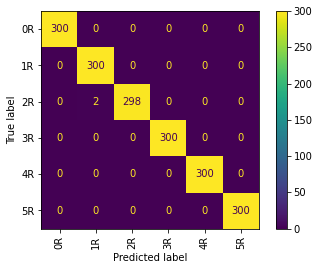

In [ ]:
#Datos de prueba.
predictions=model_CNN.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=names)
disp.plot(xticks_rotation='vertical', values_format='d')

In [ ]:
#Datos de prueba
predictions=model_CNN.predict(X_test)
decoded_predictions = predictions.argmax(axis=1)

print(f'Reporte de clasificación:')
print(classification_report(y_test,decoded_predictions))

57/57 [==============================] - 13s 220ms/step
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       300
           1       0.99      1.00      1.00       300
           2       1.00      0.99      1.00       300
           3       1.00      1.00      1.00       300
           4       1.00      1.00      1.00       300
           5       1.00      1.00      1.00       300

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800



La exactitud que se observaba en los datos de entrenamiento se mantiene también para los datos de prueba.

## Pruebas
A continuación probamos el modelo sobre fotos diferentes que no están en el dataset original.

In [ ]:
#Cargar la imagen
img_array = cv2.imread('/content/drive/MyDrive/Semestre 2022-2S/Intro a la IA/MICROPROYECTOS IA/Microproyecto 4/the-man-s-hand-that-holds-two-fingers-is-a-v-sign-meaning-victory-or-still-means-peace-and-contempt-for-challenges-on-bl.jpg')
img_array = cv2.resize(img_array,dsize=(128,128),interpolation=cv2.INTER_CUBIC)
img_array = (np.expand_dims(img_array, 0))
img_array.shape

(1, 128, 128, 3)

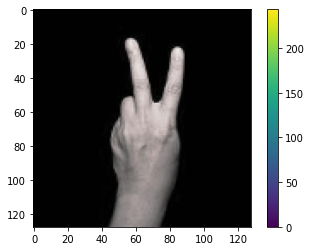

In [ ]:
plt.figure()
plt.imshow(img_array[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
predictions_single = model_CNN.predict(img_array)

print(predictions_single)

1/1 [==============================] - 0s 82ms/step
[[0. 0. 1. 0. 0. 0.]]


In [ ]:
#Analizar a quién le corresponde esa clase
prediction_result = np.argmax(predictions_single[0])
print('Etiqueta predicha: ', prediction_result)
print('Corresponde a: ', names[prediction_result]) 

Etiqueta predicha:  2
Corresponde a:  2R


Es interesante que esta foto la haya predicho bien, pues la mano se encuentra 'de espalda'.

In [ ]:
#Cargar la imagen
img_array = cv2.imread('/content/drive/MyDrive/Semestre 2022-2S/Intro a la IA/MICROPROYECTOS IA/Microproyecto 4/IMG_20221119_201650934.jpg')
img_array = cv2.resize(img_array,dsize=(128,128),interpolation=cv2.INTER_CUBIC)
img_array = (np.expand_dims(img_array, 0))
img_array.shape

(1, 128, 128, 3)

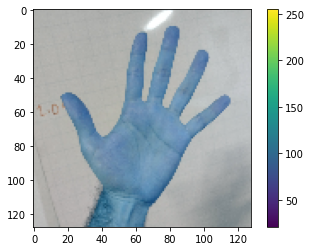

In [ ]:
plt.figure()
plt.imshow(img_array[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
predictions_single = model_CNN.predict(img_array)

print(predictions_single)

#Analizar a quién le corresponde esa clase
prediction_result = np.argmax(predictions_single[0])
print('Etiqueta predicha: ', prediction_result)
print('Corresponde a: ', names[prediction_result]) 

1/1 [==============================] - 0s 25ms/step
[[1.00000e+00 5.72928e-23 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]]
Etiqueta predicha:  0
Corresponde a:  0R


Aquí creemos que la red está tomando el fondo blanco como un gran puño, y por eso la etiqueta como 0R.

In [ ]:
#Cargar la imagen
img_array = cv2.imread('/content/drive/MyDrive/Semestre 2022-2S/Intro a la IA/MICROPROYECTOS IA/Microproyecto 4/IMG_20221119_202449153.jpg')
img_array = cv2.resize(img_array,dsize=(128,128),interpolation=cv2.INTER_CUBIC)
img_array = (np.expand_dims(img_array, 0))
img_array.shape

(1, 128, 128, 3)

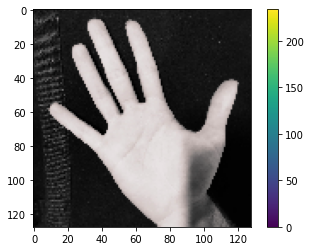

In [ ]:
plt.figure()
plt.imshow(img_array[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
predictions_single = model_CNN.predict(img_array)

print(predictions_single)

#Analizar a quién le corresponde esa clase
prediction_result = np.argmax(predictions_single[0])
print('Etiqueta predicha: ', prediction_result)
print('Corresponde a: ', names[prediction_result]) 

1/1 [==============================] - 0s 26ms/step
[[0. 0. 0. 0. 0. 1.]]
Etiqueta predicha:  5
Corresponde a:  5R


Esta foto es la mano de Alejo y la predicción es correcta.
La imagen se encuentra en blanco y negro, con fondo negro y centrada.

In [ ]:
#Cargar la imagen
img_array = cv2.imread('/content/drive/MyDrive/Semestre 2022-2S/Intro a la IA/MICROPROYECTOS IA/Microproyecto 4/IMG_20221119_203202310.jpg')
img_array = cv2.resize(img_array,dsize=(128,128),interpolation=cv2.INTER_CUBIC)
img_array = (np.expand_dims(img_array, 0))
img_array.shape

(1, 128, 128, 3)

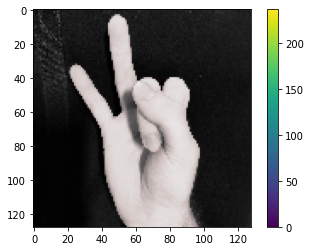

In [ ]:
plt.figure()
plt.imshow(img_array[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
predictions_single = model_CNN.predict(img_array)

print(predictions_single)

#Analizar a quién le corresponde esa clase
prediction_result = np.argmax(predictions_single[0])
print('Etiqueta predicha: ', prediction_result)
print('Corresponde a: ', names[prediction_result]) 

1/1 [==============================] - 0s 25ms/step
[[0. 0. 0. 0. 1. 0.]]
Etiqueta predicha:  4
Corresponde a:  4R


En esta foto, los dos dedos levantados no son los que se utilizaron para entrenar la red para el caso de 2R.

## Conclusiones

Notemos que las imágenes de nuestro dataset todas son muy similares y las condiciones en las que se encuentran son ideales: no existe ruido de fondo y están centradas. Es por esto que la exactitud es casi 1, pero no son capaces de extrapolar lo aprendido a imágenes ligeramente distintas.

## Transformando imágenes

In [ ]:
#Comentar si se usa desde escritorio.
!pip install keras
from google.colab import drive
drive.mount('/content/drive/')    #Acceder a las carpetas training data y validadtion que están desde google drive.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Librerias usadas
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import itertools
import math
import os
from sklearn.metrics import confusion_matrix
from skimage import io 
from skimage.transform import rescale, resize, downscale_local_mean
from random import randint, choice, choices
from tensorflow import keras
from PIL import Image
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import cv2
from tqdm import tqdm
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, Activation, BatchNormalization

In [ ]:
#Cargado de imágenes
#Ruta donde esté ubicado el archivo .npy, este se debera cambiar para qu eles funcione
path = "/content/drive/MyDrive/Semestre 2022-2S/Intro a la IA/MICROPROYECTOS IA/Microproyecto 4/"
X_train = np.load(path + 'X_train.npy', allow_pickle=True) 
y_train = np.load(path + 'y_train.npy', allow_pickle=True)
X_train = X_train/255      #255 es el valor en la escala más alta de colores.

X_test = np.load(path + 'X_test.npy', allow_pickle=True) 
y_test = np.load(path + 'y_test.npy', allow_pickle=True)
X_test = X_test/255 #255 es el valor en la escala más alta de colores.

X_valid = np.load(path + 'X_valid.npy', allow_pickle=True) 
y_valid = np.load(path + 'y_valid.npy', allow_pickle=True)
X_valid = X_valid/255 #255 es el valor en la escala más alta de colores.

names = ['0R', '1R', '2R', '3R', '4R', '5R']

### Transformamos imágenes para Training

Primero, se van a tomar solo la mitad de las imágenes para evitar inconvenientes de memoria.

In [ ]:
X_train = X_train[4500:]
y_train = y_train[4500:]

In [ ]:
#Libreria para ImageDataGenerator.
from keras.preprocessing.image import ImageDataGenerator

HORIZONTAL_FLIP = True
CLASS_NAMES=names           #Nombre de los labels de sus clases.

Vamos a agregar 450 nuevas imágenes transformadas de las que ya habían. Los efectos utilizados son rotación, zoom, espejo horizontal, desplazamiento.

In [ ]:
ROTATION_RANGE = 30
SHEAR_RANGE = 30.0

#Estructura de nuestro IMAGE GENERATOR
datagen = ImageDataGenerator(
        rotation_range=ROTATION_RANGE,
        height_shift_range=0.2,
        shear_range=SHEAR_RANGE,
        zoom_range=0.2,
        horizontal_flip=HORIZONTAL_FLIP,
        fill_mode='constant')

i = 0
# se agregan 
num_image=450        #Numero de imagenes transformadas
for batch in datagen.flow(X_train, y_train,
                        batch_size=1,
                        save_prefix="t_hand",

                        save_to_dir='/content/drive/MyDrive/Semestre 2022-2S/Intro a la IA/MICROPROYECTOS IA/Microproyecto 4/ImagTransTrain',                        
                        save_format='jpg'  #Revisar el formato de las imagenes de sus datasets. En este caso son jpg.
                        ):

    # resulta que la variable 'batch' contiene ya la matriz que representa la imagen transformada junto a la etiqueta respectiva
    # entonces solo necesitamos agregar la matriz de la imagen a nuestros datos de imágenes y la etiqueta a las etiquetas.
    X_train = np.append(X_train, [batch[0][0]], axis = 0)
    y_train = np.append(y_train, batch[1][0])

    if i >= num_image: 
        break  # Sino se especifica un break. Generará imagenes infinitamente
    i += 1

In [ ]:
X_train.shape, y_train.shape

((4951, 128, 128, 3), (4951,))

In [ ]:
# como las nuevas imágenes se fueron agregando al final, es importante volver a mezclar los datos
X_train, y_train = shuffle(X_train, y_train)

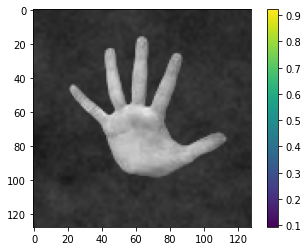

5


(128, 128, 3)

In [ ]:
plt.figure()
plt.imshow(X_train[4600])
plt.colorbar()
plt.grid(False)
plt.show()
print(y_train[4600])
(X_train[4600]).shape

A continuación, el procedimiento es totalmente análogo al anterior.
Tanto para testing como para validation se va a agregar 90 imágenes nuevas transformadas.

### Transformamos imágenes para Testing

In [ ]:
X_test = X_test[900:]
y_test = y_test[900:]

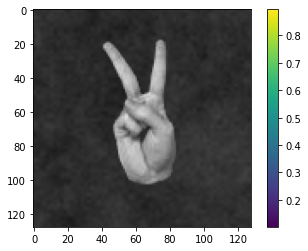

0


(128, 128, 3)

In [ ]:
plt.figure()
plt.imshow(X_test[0])
plt.colorbar()
plt.grid(False)
plt.show()
print(y_train[0])
(X_test[0]).shape

In [ ]:
#Libreria para ImageDataGenerator.
from keras.preprocessing.image import ImageDataGenerator

HORIZONTAL_FLIP = True
CLASS_NAMES=names           #Nombre de los labels de sus clases.

In [ ]:
ROTATION_RANGE = 30
SHEAR_RANGE = 30.0

#Estructura de nuestro IMAGE GENERATOR
datagen = ImageDataGenerator(
        rotation_range=ROTATION_RANGE,
        height_shift_range=0.2,
        shear_range=SHEAR_RANGE,
        zoom_range=0.2,
        horizontal_flip=HORIZONTAL_FLIP,
        fill_mode='constant')

i = 0
num_image=90        #Numero de imagenes transformadas
for batch in datagen.flow(X_test, y_test,
                        batch_size=1,
                        save_prefix="t_hand",

                        save_to_dir='/content/drive/MyDrive/Semestre 2022-2S/Intro a la IA/MICROPROYECTOS IA/Microproyecto 4/ImagTransTest',                        
                        save_format='jpg'  #Revisar el formato de las imagenes de sus datasets. En este caso son jpg.
                        ):

    X_test = np.append(X_test, [batch[0][0]], axis = 0)
    y_test = np.append(y_test, batch[1][0])

    if i >= num_image: 
        break  # Sino se especifica un break. Generará imagenes infinitamente
    i += 1

In [ ]:
X_test.shape, y_test.shape

((991, 128, 128, 3), (991,))

In [ ]:
X_test, y_test = shuffle(X_test, y_test)

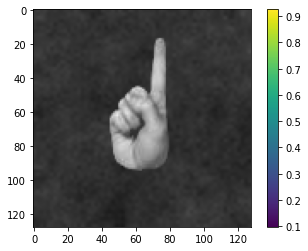

1


(128, 128, 3)

In [ ]:
plt.figure()
plt.imshow(X_test[900])
plt.colorbar()
plt.grid(False)
plt.show()
print(y_test[900])
(X_test[900]).shape

### Transformamos imágenes para Validation

In [ ]:
X_valid = X_valid[900:]
y_valid = y_valid[900:]

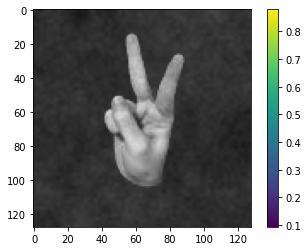

2


(128, 128, 3)

In [ ]:
plt.figure()
plt.imshow(X_valid[0])
plt.colorbar()
plt.grid(False)
plt.show()
print(y_valid[0])
(X_valid[0]).shape

In [ ]:
#Libreria para ImageDataGenerator.
from keras.preprocessing.image import ImageDataGenerator

HORIZONTAL_FLIP = True
CLASS_NAMES=names           #Nombre de los labels de sus clases.

In [ ]:
ROTATION_RANGE = 30
SHEAR_RANGE = 30.0

#Estructura de nuestro IMAGE GENERATOR
datagen = ImageDataGenerator(
        rotation_range=ROTATION_RANGE,
        height_shift_range=0.2,
        shear_range=SHEAR_RANGE,
        zoom_range=0.2,
        horizontal_flip=HORIZONTAL_FLIP,
        fill_mode='constant')

i = 0
num_image=90        #Numero de imagenes transformadas
for batch in datagen.flow(X_valid, y_valid,
                        batch_size=1,
                        save_prefix="t_hand",

                        save_to_dir='/content/drive/MyDrive/Semestre 2022-2S/Intro a la IA/MICROPROYECTOS IA/Microproyecto 4/ImagTransValid',                        
                        save_format='jpg'  #Revisar el formato de las imagenes de sus datasets. En este caso son jpg.
                        ):

    X_valid = np.append(X_valid, [batch[0][0]], axis = 0)
    y_valid = np.append(y_valid, batch[1][0])

    if i >= num_image: 
        break  # Sino se especifica un break. Generará imagenes infinitamente
    i += 1

In [ ]:
X_valid.shape, y_valid.shape

((991, 128, 128, 3), (991,))

In [ ]:
X_valid, y_valid = shuffle(X_valid, y_valid)

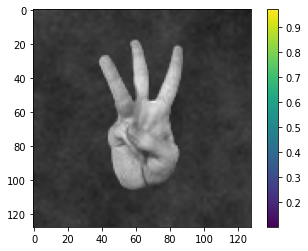

3


(128, 128, 3)

In [ ]:
plt.figure()
plt.imshow(X_valid[900])
plt.colorbar()
plt.grid(False)
plt.show()
print(y_valid[900])
(X_valid[900]).shape

## Callbacks

Vamos a implementar callback

In [ ]:
#Librerias necesarias para el uso de callbacks
from pathlib import Path
from keras.callbacks import CSVLogger, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
import datetime

def create_callbacks(output_dirs, model_name, stopping_patience, lr_patience, initial_lr):

    # Asegura que las carpetas donde se almacenarán las salidas de los "callbacks" estén creadas.
    for output_dir in output_dirs.values():

        Path(output_dir).mkdir(parents=True, exist_ok=True)

    csv_logger = CSVLogger(os.path.join(output_dirs["/training_metrics"], f"{model_name}.csv"))
    early_stopping = EarlyStopping(patience=stopping_patience, verbose=1, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(os.path.join(output_dirs["/models"], f"{model_name}.hdf5"),
        verbose=1,
        save_best_only=True
    )

    # Reduce la tasa de aprendizaje a la mitad (como máximo 5 veces) en caso de no haber 
    # mejora durante varios "epochs".
    reduce_lr = ReduceLROnPlateau(factor=0.5, patience=lr_patience, min_lr=initial_lr * (0.5 ** 5))

    timestamp = datetime.datetime.now().strftime("%d%m%Y_%H%M%S")
    tensorboard = TensorBoard(
        os.path.join(output_dirs["/tensorboard_logs"], f'{model_name}_{timestamp}'),
        histogram_freq=1,
        write_images=True,
        write_steps_per_second=True,
        profile_batch=(10, 20)
    )

    return csv_logger, early_stopping, model_checkpoint, reduce_lr, tensorboard

In [ ]:

OUTPUT_DIRS = {
    "/training_metrics": "./content/drive/MyDrive/Semestre 2022-2S/Intro a la IA/MICROPROYECTOS IA/Microproyecto 4/training_metrics",
    "/models": "./content/drive/MyDrive/Semestre 2022-2S/Intro a la IA/MICROPROYECTOS IA/Microproyecto 4/outputs/models",
    "/tensorboard_logs": "./content/drive/MyDrive/Semestre 2022-2S/Intro a la IA/MICROPROYECTOS IA/Microproyecto 4/outputs/tensorboard_logs"
}

MODEL_NAME = "model_hand_v0"      #Nombre del modelo
STOPPING_PATIENCE = 16  # Cantidad de "epochs" sin mejora para detener el entrenamiento.
LR_PATIENCE = 8  # Cantidad de "epochs" sin mejora para reducir la tasa de aprendizaje.
INITIAL_LR = 0.0001

callbacks = create_callbacks(OUTPUT_DIRS, MODEL_NAME, STOPPING_PATIENCE,
                             LR_PATIENCE, INITIAL_LR)

In [ ]:
#Uso del callback y balanceo
model_CNN = keras.Sequential([
    keras.layers.Input(shape=(128,128,3)),     
    #Caracterizacion de las imagenes
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'), 
    keras.layers.AveragePooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),  
    keras.layers.AveragePooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),   

    #Etapa de clasificacion
    keras.layers.Flatten(),     #Aplanar los datos a un vector unidimensional
    keras.layers.Dense(64, activation=tf.nn.relu),#Implementza la operación f(z)
    keras.layers.Dense(len(names), activation=tf.nn.softmax)
])
tf.keras.utils.plot_model(model_CNN, show_shapes=True)

model_CNN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Utilización de los datos transformados.
history_relu = model_CNN.fit(X_train,y_train,
                    validation_data=(X_valid, y_valid),
                    callbacks=callbacks,        #Uso del callback.
                    epochs=9)

Epoch 1/9
155/155 [==============================] - ETA: 0s - loss: 0.4367 - accuracy: 0.8459
Epoch 1: val_loss improved from inf to 0.14442, saving model to ./content/drive/MyDrive/Semestre 2022-2S/Intro a la IA/MICROPROYECTOS IA/Microproyecto 4/outputs/models/model_hand_v0.hdf5
155/155 [==============================] - 127s 815ms/step - loss: 0.4367 - accuracy: 0.8459 - val_loss: 0.1444 - val_accuracy: 0.9516 - lr: 0.0010
Epoch 2/9
155/155 [==============================] - ETA: 0s - loss: 0.1023 - accuracy: 0.9669
Epoch 2: val_loss improved from 0.14442 to 0.09900, saving model to ./content/drive/MyDrive/Semestre 2022-2S/Intro a la IA/MICROPROYECTOS IA/Microproyecto 4/outputs/models/model_hand_v0.hdf5
155/155 [==============================] - 125s 807ms/step - loss: 0.1023 - accuracy: 0.9669 - val_loss: 0.0990 - val_accuracy: 0.9687 - lr: 0.0010
Epoch 3/9
155/155 [==============================] - ETA: 0s - loss: 0.0406 - accuracy: 0.9861
Epoch 3: val_loss improved from 0.09900 t

Vamos a comprobar los resultados

31/31 [==============================] - 7s 212ms/step
Confusion Matrix


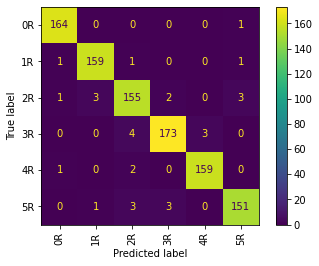

In [ ]:
#Datos de prueba.
predictions=model_CNN.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=names)
disp.plot(xticks_rotation='vertical', values_format='d')

In [ ]:
#Metricas para examinar el modelo bajo datos transformados.
predictions=model_CNN.predict(X_test)
decoded_predictions = predictions.argmax(axis=1)

print(f'Reporte de clasificación:')
print(classification_report(y_test,decoded_predictions))

31/31 [==============================] - 7s 211ms/step
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       165
           1       0.98      0.98      0.98       162
           2       0.94      0.95      0.94       164
           3       0.97      0.96      0.97       180
           4       0.98      0.98      0.98       162
           5       0.97      0.96      0.96       158

    accuracy                           0.97       991
   macro avg       0.97      0.97      0.97       991
weighted avg       0.97      0.97      0.97       991



De las métricas anteriores se ve que la exactitud disminuyó ligeramente, pero el rendimiento en general sigue siendo bastante bueno.

Procedemos a evaluar el modelo en las mismas imágenes que habíamos hecho antes para ver si los resultados cambiaron.

In [ ]:
#Cargar la imagen
img_array = cv2.imread('/content/drive/MyDrive/Semestre 2022-2S/Intro a la IA/MICROPROYECTOS IA/Microproyecto 4/the-man-s-hand-that-holds-two-fingers-is-a-v-sign-meaning-victory-or-still-means-peace-and-contempt-for-challenges-on-bl.jpg')
img_array = cv2.resize(img_array,dsize=(128,128),interpolation=cv2.INTER_CUBIC)
img_array = (np.expand_dims(img_array, 0))
img_array.shape

(1, 128, 128, 3)

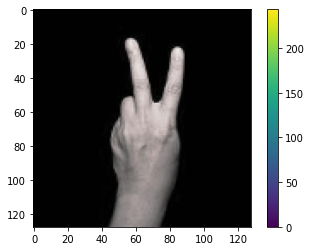

In [ ]:
plt.figure()
plt.imshow(img_array[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
predictions_single = model_CNN.predict(img_array)

print(predictions_single)

1/1 [==============================] - 0s 88ms/step
[[0. 0. 1. 0. 0. 0.]]


In [ ]:
#Analizar a quién le corresponde esa clase
prediction_result = np.argmax(predictions_single[0])
print('Etiqueta predicha: ', prediction_result)
print('Corresponde a: ', names[prediction_result]) 

Etiqueta predicha:  2
Corresponde a:  2R


Es interesante que esta foto la haya predicho bien, pues la mano se encuentra 'de espalda'. Este resultado es igual que el anterior.

In [ ]:
#Cargar la imagen
img_array = cv2.imread('/content/drive/MyDrive/Semestre 2022-2S/Intro a la IA/MICROPROYECTOS IA/Microproyecto 4/IMG_20221119_201650934.jpg')
img_array = cv2.resize(img_array,dsize=(128,128),interpolation=cv2.INTER_CUBIC)
img_array = (np.expand_dims(img_array, 0))
img_array.shape

(1, 128, 128, 3)

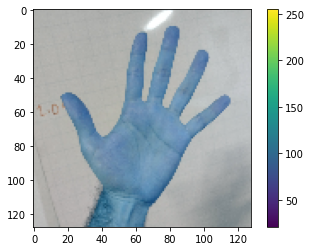

In [ ]:
plt.figure()
plt.imshow(img_array[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
predictions_single = model_CNN.predict(img_array)

print(predictions_single)

#Analizar a quién le corresponde esa clase
prediction_result = np.argmax(predictions_single[0])
print('Etiqueta predicha: ', prediction_result)
print('Corresponde a: ', names[prediction_result]) 

1/1 [==============================] - 0s 26ms/step
[[0. 0. 0. 1. 0. 0.]]
Etiqueta predicha:  3
Corresponde a:  3R


Ahora ya no predice 0R, sino 3R

In [ ]:
#Cargar la imagen
img_array = cv2.imread('/content/drive/MyDrive/Semestre 2022-2S/Intro a la IA/MICROPROYECTOS IA/Microproyecto 4/IMG_20221119_202449153.jpg')
img_array = cv2.resize(img_array,dsize=(128,128),interpolation=cv2.INTER_CUBIC)
img_array = (np.expand_dims(img_array, 0))
img_array.shape

(1, 128, 128, 3)

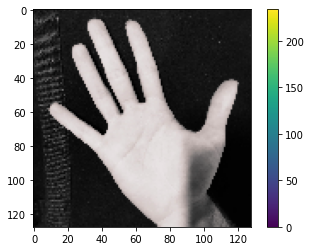

In [ ]:
plt.figure()
plt.imshow(img_array[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
predictions_single = model_CNN.predict(img_array)

print(predictions_single)

#Analizar a quién le corresponde esa clase
prediction_result = np.argmax(predictions_single[0])
print('Etiqueta predicha: ', prediction_result)
print('Corresponde a: ', names[prediction_result]) 

1/1 [==============================] - 0s 29ms/step
[[0. 0. 0. 0. 0. 1.]]
Etiqueta predicha:  5
Corresponde a:  5R


Esta foto es la mano de Alejo y la predicción es correcta.
La imagen se encuentra en blanco y negro, con fondo negro y centrada.

In [ ]:
#Cargar la imagen
img_array = cv2.imread('/content/drive/MyDrive/Semestre 2022-2S/Intro a la IA/MICROPROYECTOS IA/Microproyecto 4/IMG_20221119_203202310.jpg')
img_array = cv2.resize(img_array,dsize=(128,128),interpolation=cv2.INTER_CUBIC)
img_array = (np.expand_dims(img_array, 0))
img_array.shape

(1, 128, 128, 3)

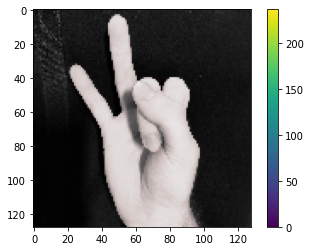

In [ ]:
plt.figure()
plt.imshow(img_array[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
predictions_single = model_CNN.predict(img_array)

print(predictions_single)

#Analizar a quién le corresponde esa clase
prediction_result = np.argmax(predictions_single[0])
print('Etiqueta predicha: ', prediction_result)
print('Corresponde a: ', names[prediction_result]) 

1/1 [==============================] - 0s 25ms/step
[[0. 0. 0. 1. 0. 0.]]
Etiqueta predicha:  3
Corresponde a:  3R


Esta imagen también sigue siendo clasificada erroneamente

Al final, esta CNN es mejor que la original pero sigue teniendo errores de predicción.